### 18th Winter school on Mathematical Finance
<p>

### Lunteren, January 21-23, 2019

<p>
<p>

### Rough volatility

<p>
#### Lecture 1: Econometrics





Jim Gatheral   
Department of Mathematics     

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3> 

$$
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\ben}{\begin{enumerate}}
\newcommand{\een}{\end{enumerate}}
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\bv}{\begin{verbatim}}
\newcommand{\ev}{\end{verbatim}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\sigl}{\sigma_L}
\newcommand{\BS}{\rm BS}
\newcommand{\vix}{\text{VIX}}
\newcommand{\p}{\partial}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\mt}{\mathbf{t}}
\newcommand{\mS}{\mathbf{S}}
\newcommand{\tC}{\widetilde{C}}
\newcommand{\hC}{\widehat{C}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\tH}{\widetilde{H}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cv}{\mathcal{v}}
\newcommand{\cg}{\mathcal{g}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\dt}{\Delta t}
\newcommand{\tr}{{\rm tr}}
\newcommand{\sgn}{\mathrm{sign}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$



### Outline of Lecture 1

* The briefest possible introduction to R and iPython notebook


* The time series of historical volatility
  - Scaling properties
  - Approximate normality of increments of log volatility


* Approximate multifractality


* Estimation of H


### What is R? (http://cran.r-project.org)

From Wikipedia:

- In computing, R is a programming language and software environment for statistical computing and graphics. It is an implementation of the S programming language with lexical scoping semantics inspired by Scheme.


- R was created by Ross Ihaka and Robert Gentleman at the University of Auckland, New Zealand, and is now developed by the R Development Core Team. It is named partly after the first names of the first two R authors (Robert Gentleman and Ross Ihaka), and partly as a play on the name of S. The R language has become a de facto standard among statisticians for the development of statistical software.

- R is widely used for statistical software development and data analysis. R is part of the GNU project, and its source code is freely available under the GNU General Public License, and pre-compiled binary versions are provided for various operating systems. R uses a command line interface, though several graphical user interfaces are available.

### The IPython Notebook (http://ipython.org/notebook.html)

From ipython.org:

The IPython Notebook is a web-based interactive computational environment where you can combine code execution, text, mathematics, plots and rich media into a single document:

The IPython notebook with embedded text, code, math and figures.  These notebooks are normal files that can be shared with colleagues, converted to other formats such as HTML or PDF, etc. You can share any publicly available notebook by using the IPython Notebook Viewer service which will render it as a static web page. This makes it easy to give your colleagues a document they can read immediately without having to install anything.



http://nbviewer.ipython.org/github/dboyliao/cookbook-code/blob/master/notebooks/chapter07_stats/08_r.ipynb has instructions on using R with iPython notebook.

### Motivation for econometric study

- <span>[Alòs et al.]<sup id="cite_ref-Alos" class="reference"><a href="#cite_note-Alos">[1]</a></sup>  and subsequently <span>[Fukasawa]<sup id="cite_ref-Fukasawa" class="reference"><a href="#cite_note-Fukasawa">[9]</a></sup> showed that the empirically observed power-law term structure of the at-the-money volatility skew could be replicated in the short expiration limit by a stochastic volatility model where the volatility process is a function of fractional Brownian motion (fBm). 


- For such a model to offer a realistic description of the historical time series of instantaneous volatility, this time series would have to exhibit scaling properties consistent with fBm. 


- It is therefore natural to investigate the scaling properties of volatility time series.  

### The time series of realized variance

- We would like to study the time series of instantaneous variance $v_t$ but of course cannot because $v_t$ is latent.


- On the other hand, integrated variance $\frac 1 \delta \,\int_t^{t+\delta}\,v_s\,ds$ may (in principle) be estimated arbitrarily accurately given enough price data.

    - In practice, market microstructure noise makes estimation harder at very high frequency.
    - Sophisticated estimators of integrated variance have been developed to adjust for market microstructure noise.  See Gatheral and Oomen <sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>9<span>]</span></a></sup> (for example) for details of these.

- The Oxford-Man Institute of Quantitative Finance makes historical realized variance (RV) estimates freely available at http://realized.oxford-man.ox.ac.uk.  These estimates are updated daily.

    - Each day, for 31 different indices, all trades and quotes are used to estimate realized (or integrated) variance over the trading day from open to close.



- Using daily RV estimates as proxies for instantaneous variance, we may investigate the time series properties of integrated variance empirically.

First update and save the latest Oxford-Man data:

In [2]:
setwd("./LRV")

ERROR: Error in setwd("./LRV"): cannot change working directory


In [3]:
download.file(url="https://realized.oxford-man.ox.ac.uk/images/oxfordmanrealizedvolatilityindices.zip", destfile="oxfordRvData.zip")
unzip(zipfile="oxfordRvData.zip")

There are many different estimates of realized variance, all of them very similar.  We will use the realized kernel estimates denoted by ".rk".

In [4]:
library(quantmod)
library(repr)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [6]:
rv.data <- read.csv("OxfordManRealizedVolatilityIndices.csv")


rv1 <- data.frame(rv.data$X,rv.data$Symbol,rv.data$rk_th2) # Tukey-Hanning kernel
names(rv1) <- c("Date","Symbol","rk")
index.names <- as.matrix(unique(rv1$Symbol))

In [7]:
rv.list <- NULL
index.names <- as.matrix(index.names)

In [8]:
n <- length(index.names)

for (i in 1:n){
    pick <- (rv1$Symbol==index.names[i])
    tmp <- rv1[pick,]
    #print(tmp$Date[1218:1222])
    #dates <- strptime(as.character(tmp$Date),"%Y-%m-%d")
    dates <- as.Date(as.character(tmp$Date),"%Y-%m-%d")
    #print(which(is.na(dates)==TRUE))
    #print(dates[1218:1222])
    tmp.krv1 <- xts(tmp$rk,order.by=dates) 
    rv.list[[i]] <- tmp.krv1[(tmp.krv1!="")&(tmp.krv1!="0")]
}

In [9]:
names(rv.list) <- index.names
names(rv.list)

[1] ".AEX"      ".AORD"     ".BFX"      ".BSESN"    ".BVLG"     ".BVSP"    
 [7] ".DJI"      ".FCHI"     ".FTMIB"    ".FTSE"     ".GDAXI"    ".GSPTSE"  
[13] ".HSI"      ".IBEX"     ".IXIC"     ".KS11"     ".KSE"      ".MXX"     
[19] ".N225"     ".NSEI"     ".OMXC20"   ".OMXHPI"   ".OMXSPI"   ".OSEAX"   
[25] ".RUT"      ".SMSI"     ".SPX"      ".SSEC"     ".SSMI"     ".STI"     
[31] ".STOXX50E"

Let's plot SPX realized variance.

In [10]:
library(repr)
options(repr.plot.width=14,repr.plot.height=8)

In [11]:
spx.rk <- rv.list[[".SPX"]]
stoxx.rk <- rv.list[[".STOXX50E"]]

In [12]:
save(spx.rk,stoxx.rk,file="OxfordRV.rData")

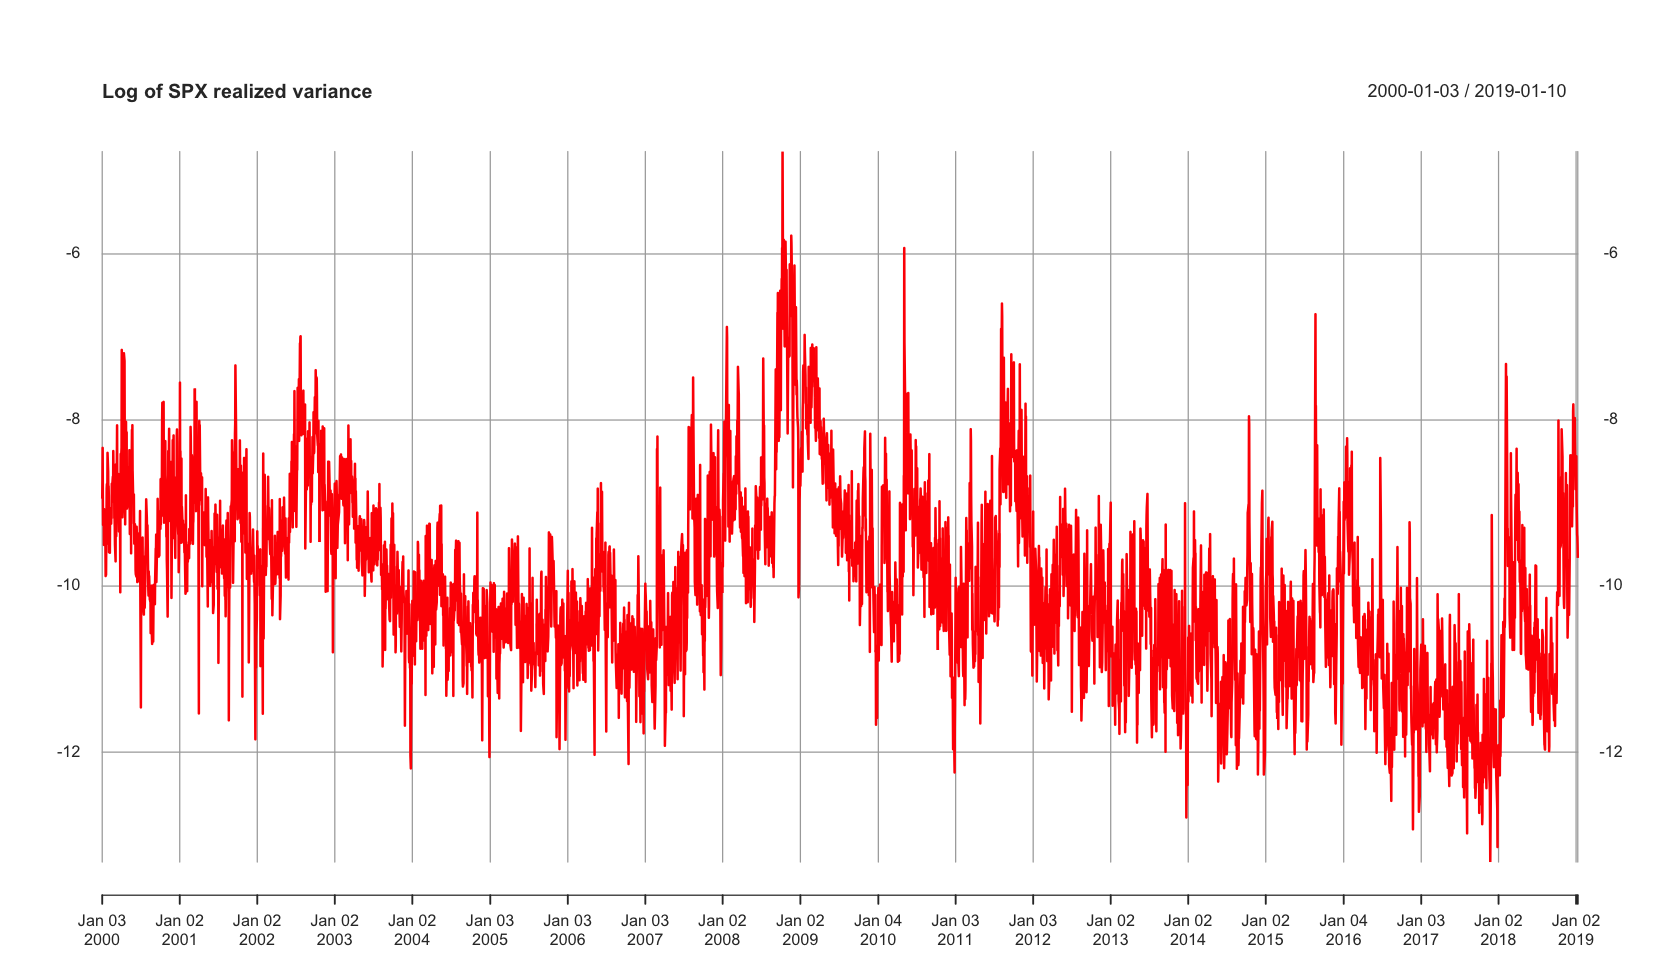

In [13]:
plot(log(spx.rk), main="Log of SPX realized variance",col="red")

Figure 1: Oxford-Man Log KRV estimates of SPX realized variance from January 2000 to the current date.

In [14]:
print(head(spx.rk))
print(tail(spx.rk))

                   [,1]
2000-01-03 1.301572e-04
2000-01-04 1.622259e-04
2000-01-05 2.398365e-04
2000-01-06 1.322324e-04
2000-01-07 9.486773e-05
2000-01-10 1.121113e-04
                   [,1]
2019-01-03 2.168852e-04
2019-01-04 1.305852e-04
2019-01-07 8.449293e-05
2019-01-08 8.199344e-05
2019-01-09 7.417078e-05
2019-01-10 6.374206e-05


### Scaling of the volatility process


For $q\geq 0$, we define the $q$th sample moment of differences of log-volatility at a given lag $\Delta$.($\angl{\cdot}$ denotes the sample average):

$$
m(q,\Delta)=\angl{\left|\log \sigma_{t+\Delta} -\log \sigma_{t} \right|^q}
$$

For example

$$
m(2,\Delta)=\angl{\left(\log \sigma_{t+\Delta} -\log \sigma_{t} \right)^2}
$$

is just the sample variance of differences in log-volatility at the lag $\Delta$.




### Scaling of $m(q,\Delta)$ with lag $\Delta$

In [15]:
sig <- sqrt(as.numeric(spx.rk))

mq.del.Raw <- function(q,lag){mean(abs(diff(log(sig),lag=lag))^q)}
mq.del <- function(x,q){sapply(x,function(x){mq.del.Raw(q,x)})}

# Plot mq.del(1:100,q) for various q

x <- 1:100

mycol <- rainbow(5)

ylab <- expression(paste(log," ",m(q,Delta)))
xlab <- expression(paste(log, " ", Delta))

qVec <- c(.5,1,1.5,2,3)
zeta.q <- numeric(5)
q <- qVec[1]

In [16]:
options(repr.plot.height=7, repr.plot.width=10)

[1] 0.08194562 0.16102033 0.23676425 0.30875584 0.44017336


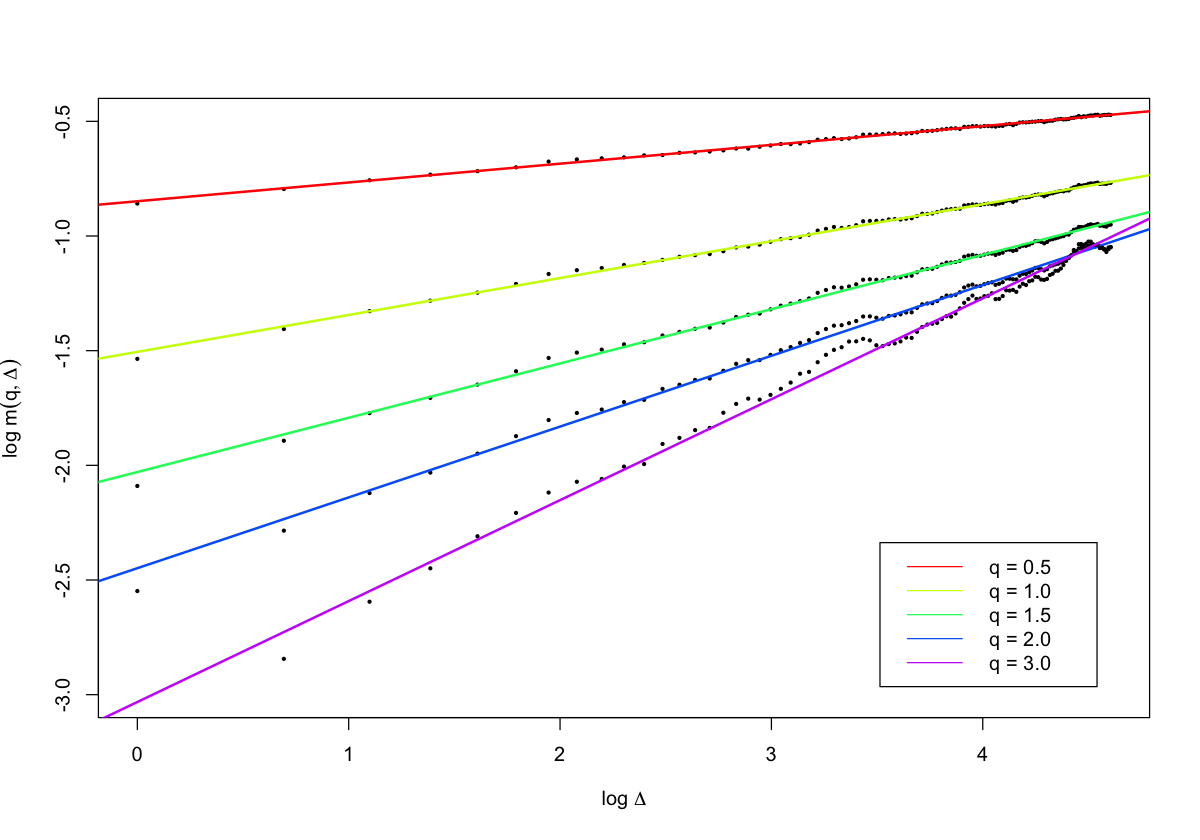

In [17]:
plot(log(x),log(mq.del(x,q)),pch=20,cex=.5,
         ylab=ylab, xlab=xlab,ylim=c(-3,-.5))
fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
abline(fit.lm, col=mycol[1],lwd=2)
zeta.q[1] <- coef(fit.lm)[2]

for (i in 2:5){
    q <- qVec[i]
    points(log(x),log(mq.del(x,q)),pch=20,cex=.5)
    fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
    abline(fit.lm, col=mycol[i],lwd=2)
    zeta.q[i] <- coef(fit.lm)[2]
    }
 legend("bottomright", c("q = 0.5","q = 1.0","q = 1.5","q = 2.0","q = 3.0"),inset=0.05, lty=1, col = mycol)

print(zeta.q)

Figure 2: $\log m(q,\Delta)$ as a function of $\log \Delta$, SPX.

### Monofractal scaling result

- From the above log-log plot, we see that for each $q$, $m(q,\Delta) \propto \Delta ^{\zeta_q}$.


- How does $\zeta_q$ scale with $q$?

### Scaling of $\zeta_q$ with $q$

qVec[1:4] 
0.1566202

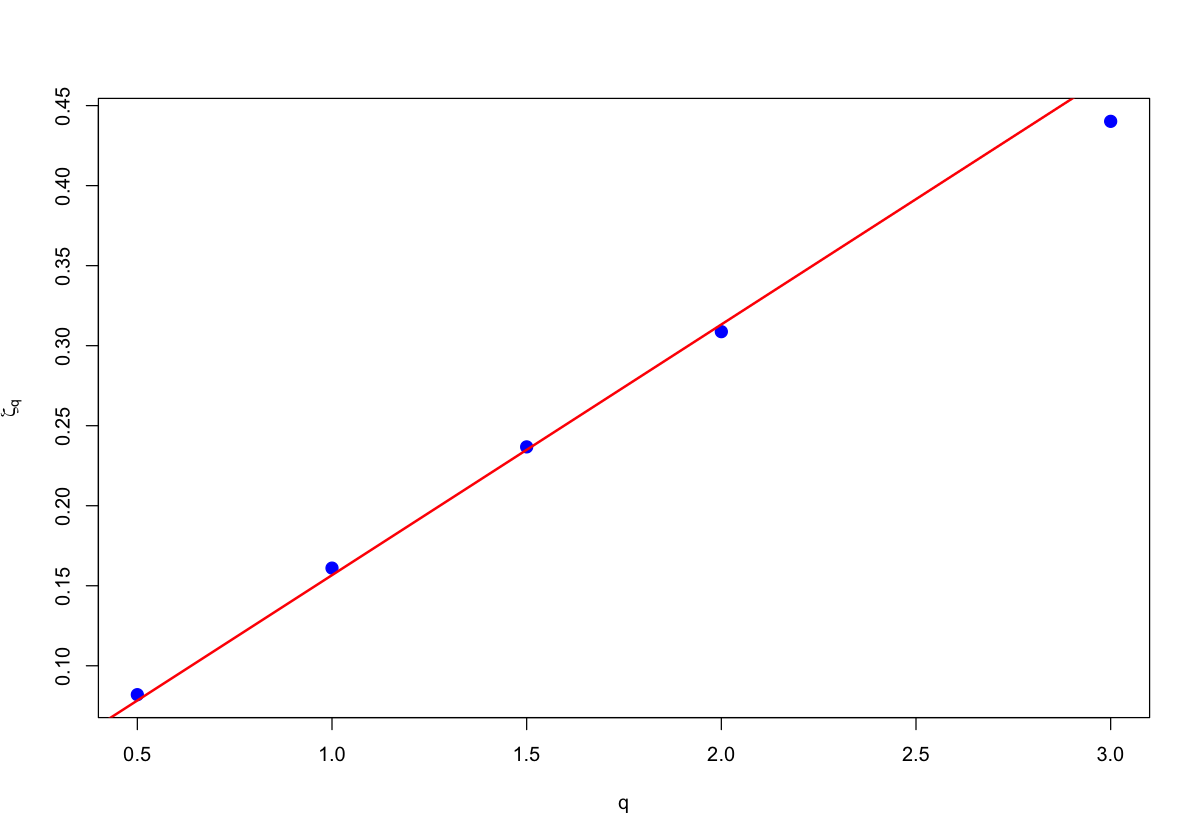

In [18]:
plot(qVec,zeta.q,xlab="q",ylab=expression(zeta[q]),pch=20,col="blue",cex=2)
fit.lm <- lm(zeta.q[1:4] ~ qVec[1:4]+0)
abline(fit.lm, col="red",lwd=2)
(h.est <- coef(fit.lm)[1])

Figure 3: Scaling of $\zeta_q$ with $q$.

We find the monofractal scaling relationship

$$
\zeta_q = q\,H
$$

with $H \approx 0.15$.

- Note however that $H$ does vary over time, in a narrow range, as we will see later.


- Note also that our estimate of $H$ is biased high because we proxied instantaneous variance $v_t$ with its average over each day $\frac 1T\,\int_0^T\,v_t\,dt$, where $T$ is one trading day.
    - On the other hand, the time series of realized variance is noisy and this causes our estimate of $H$ to be biased low.
    
    

- This scaling property as $\Delta \to 0$ is equivalent to $H$-Hölder continuity of paths of the volatility.
    - Since $H \ll 1/2$, *volatility is rough*!

### Estimated $H$ for all indices

We now repeat this analysis for all 31 indices in the Oxford-Man dataset.

In [19]:
n <- length(rv.list)
h <- numeric(n) # H is estimated as half of the slope
nu <- numeric(n)

for (i in 1:n){ # Run all the regressions
  v <- rv.list[[i]]
  sig <- sqrt(abs(as.numeric(v)))
    
  x <- 1:100
  dlsig2 <- function(lag){mean((diff(log(sig),lag=lag))^2)}
  dlsig2Vec <- function(x){sapply(x,dlsig2)}

  fit.lm <- lm(log(dlsig2Vec(x)) ~ log(x))

  nu[i] <- sqrt(exp(coef(fit.lm)[1]))
  h[i] <- coef(fit.lm)[2]/2
  
}

In [20]:
(OxfordH <- data.frame(names(rv.list),h.est=h,nu.est=nu))

names.rv.list. h.est      nu.est   
1  .AEX           0.14894456 0.2706965
2  .AORD          0.09554204 0.3035204
3  .BFX           0.13899514 0.2501847
4  .BSESN         0.12016597 0.2987163
5  .BVLG          0.09971147 0.2490247
6  .BVSP          0.12765229 0.2949439
7  .DJI           0.15548473 0.2801131
8  .FCHI          0.13419545 0.2807162
9  .FTMIB         0.12576047 0.2684509
10 .FTSE          0.13381297 0.2791950
11 .GDAXI         0.15013809 0.2614990
12 .GSPTSE        0.12541497 0.3038236
13 .HSI           0.11884095 0.2326801
14 .IBEX          0.12661706 0.2651929
15 .IXIC          0.14033643 0.2876229
16 .KS11          0.12132349 0.2686361
17 .KSE           0.11273493 0.3976586
18 .MXX           0.08634424 0.2978649
19 .N225          0.12239776 0.3027798
20 .NSEI          0.11664312 0.3268126
21 .OMXC20        0.10712565 0.3095523
22 .OMXHPI        0.11850950 0.3162702
23 .OMXSPI        0.12898628 0.3097799
24 .OSEAX         0.13302795 0.2556148
25 .RUT           0.11160780 0.3583539
26 .SMSI          0.10708354 0.3248299
27 .SPX           0.15437792 0.2939784
28 .SSEC          0.13181280 0.3304402
29 .SSMI          0.18041879 0.1737622
30 .STI           0.05678204 0.2665806
31 .STOXX50E      0.10635811 0.3537869

### Distributions of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$

Having established these beautiful scaling results for the moments, how do the histograms look?

In [21]:
plotScaling <- function(j,scaleFactor){
  v <- as.numeric(rv.list[[j]])
  x <- 1:100
  
  xDel <- function(x,lag){diff(x,lag=lag)}
  sd1 <- sd(xDel(log(v),1))
  sdl <- function(lag){sd(xDel(log(v),lag))}

  h <- OxfordH$h.est[j]
  
  plotLag <- function(lag){
    y <- xDel(log(v),lag)
    hist(y,breaks=100,freq=F,main=paste("Lag =",lag,"Days"),xlab=NA)# Very long tailed!
    curve(dnorm(x,mean=mean(y),sd=sd(y)),add=T,col="red",lwd=2)
    curve(dnorm(x,mean=0,sd=sd1*lag^h),add=T,lty=2,lwd=2,col="blue")
  }
  
  (lags <- scaleFactor^(0:3))
  print(names(rv.list)[j])
  par(mfrow=c(2,2))
  par(mar=c(3,2,1,3))
  for (i in 1:4){plotLag(lags[i])}
  par(mfrow=c(1,1))
}

In [22]:
options(repr.plot.height=5, repr.plot.width=10)

[1] ".SPX"


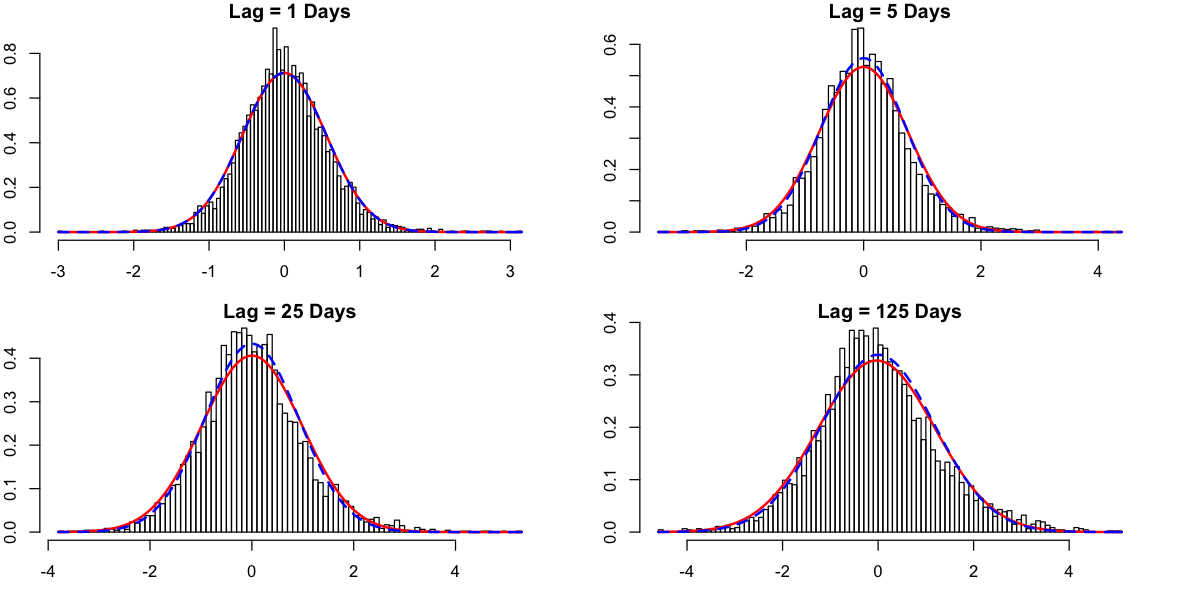

In [23]:
plotScaling(27,5)

Figure 4: Histograms of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$; normal fit in red; $\Delta=1$ normal fit scaled by $\Delta^{H}$ in blue.


### Universality?

- <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>8<span>]</span></a></sup> compute daily realized variance estimates over one hour windows for DAX and Bund futures contracts, finding similar scaling relationships.


- We have also checked that Gold and Crude Oil futures scale similarly.

    - Although the increments $(\log \sigma_{t+\Delta}-\log \sigma_t)$ seem to be fatter tailed than Gaussian.  
    
    
- <span>[Bennedsen et al.]<sup id="cite_ref-BLP" class="reference"><a href="#cite_note-BLP"><span>[</span>2<span>]</span></a></sup>, estimate volatility time series for more than five thousand individual US equities, finding rough volatility in every case.

### A microstructural explanation: A Hawkes model of price formation

- Why might rough volatility be universal?



- <span>[Jaisson and Rosenbaum]<sup id="cite_ref-JaissonRosenbaum" class="reference"><a href="#cite_note-JaissonRosenbaum"><span>[</span>10<span>]</span></a></sup> show that rough volatility can be obtained as a scaling limit of a simple model of price dynamics in terms of Hawkes processes.


- Remarkably, <span>[El Euch and Rosenbaum]<sup id="cite_ref-ElEuchRosenbaum" class="reference"><a href="#cite_note-ElEuchRosenbaum"><span>[</span>6<span>]</span></a></sup> were able to compute the characteristic function of the resulting *rough Heston* model.


### A natural model of realized volatility

- Distributions of differences in the log of realized variance are close to Gaussian.

    - This motivates us to model $\sigma_t=\log v_t$ as a lognormal random variable.


- Moreover, the scaling property of variance of RV differences suggests the model:
<p>
<a name="eq:dataDriven"></a>(1)
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$
<p>
where $W^H$ is fractional Brownian motion.


- Indeed, if $H$ is constant, [(1)](#eq:dataDriven) is the *unique* model consistent with Gaussianity of log differences, the observed scaling, and continuity of the volatility process.

### Fractional Brownian motion (fBm)

- *Fractional Brownian motion* (fBm) $\{W^H_t; t \in \mathbb{R}\}$ is the unique Gaussian process with mean zero and autocovariance function
$$
\ee{ W^H_t\,W^H_s  } = \frac12\,\left\{ |t|^{2\,H}+|s|^{2\,H}-|t-s|^{2\,H}  \right\}
$$
where $H \in (0,1)$ is called the *Hurst index* or parameter.
   - In particular, when $H=1/2$, fBm is just Brownian motion.
 
   - If $H>1/2$, increments are positively correlated ("trending").
   - If $H<1/2$, increments are negatively correlated ("reverting").

 

### Efficient estimation of $H$

- So far, we just used simple regression to estimate $H$.


- When $H$ is small, as we find empirically, out of all the estimators that we tested, the ACF estimator adopted by <span>[Bennedsen et al.]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[4]</span></a></sup> is the most efficient. 

### Heuristic derivation of the ACF estimator


Once again, the covariance structure of fBm is given by

$$
\E\left[W^H_t\,W^H_s\right]= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$


Up to a multiplicative factor, our model is 

$$
y_t = \log v_t = W^H_t.
$$

Then
$
\var[y_t] = t^{2 H}.
$
and


$$
\cov[y_t,y_{t+\Delta}] =  \frac{1}{2}\,\left\{t^{2 H} + (t+\Delta)^{2 H} - \Delta^{2 H}\right\}
$$

Dividing one by the other gives

$$
\rho(\Delta) = \frac{1}{2}\,\left\{1 + \left(1+\frac\Delta t\right)^{2 H} - \left(\frac\Delta t\right)^{2 H}\right\}
%&=& 1- \frac{1}{2}\,\left(\frac\Delta t\right)^{2 H} + O(
$$


Thus, for $\Delta/t$ sufficiently small,


$$
1-\rho(\Delta) =\frac12 \left(\frac{\Delta}{t}\right)^{2 H} + O\left(\frac{\Delta}t\right).
$$

- Note in particular that we expect the ACF estimator to work best when $H \ll \frac{1}{2}$.  

- Also, when $H=\frac12$, we have 
$
\rho(\Delta) = 1
$
as we would expect for Brownian motion.

### The ACF estimator

Taking logs of each side, we obtain

$$
\log(1- \rho(\Delta)) = a + 2\,H\, \log \Delta.
$$

- Thus $H$ can be estimated efficiently by regression.

In [24]:
h.acf <- function(path){
    y.acf <- acf(path,plot=F)
    log.del <- log(y.acf$lag[-1])
    log.lhs <- log(1-y.acf$acf[-1])
    fit.lm <- lm(log.lhs ~ log.del)
    return(fit.lm$coef[2]/2)
        }

### An example: Estimate of $H$ for 2005

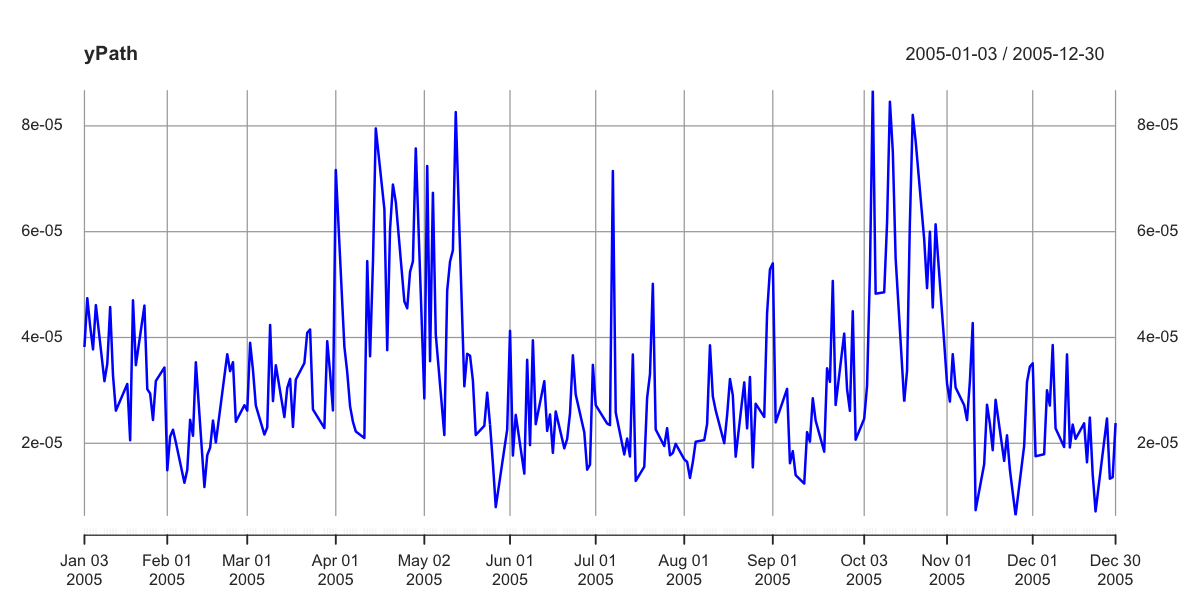

In [25]:
yPath <- spx.rk["2005-01-01::2005-12-31"]
plot(yPath,col="blue")

Figure 5: SPX realized kernel estimates of integrated variance for 2003.

In [24]:
h.acf(as.numeric(yPath))

log.del 
0.1495626

### Time series of $H$ using ACF

- We now draw the time series of $H$ using the ACF estimator.

In [26]:
h.acf.i <- function(series)function(del)function(i){
    rk.path <- as.numeric(series[(i-del):i])
    h.acf(rk.path)
    }

In [27]:
h.acf.i(spx.rk)(252)(1234)

log.del 
0.1453646

In [28]:
h.acf.series <- function(series)function(del){
    require(xts)
    n <- length(series)
    res <- sapply((1+del):n,h.acf.i(series)(del))
    return(xts(res,order.by=index(series[(1+del):length(series)]),tzone = Sys.getenv("TZ")))
}
    

### Compare the two estimates of $H$



In [29]:
rownum <- which(OxfordH[,1]==".SPX")
n.spx <- length(spx.rk)
h.spx.acf <- as.numeric(h.acf.series(spx.rk)(n.spx-1))
h.spx.regression <- OxfordH$h.est[rownum]
nu.spx.regression <- OxfordH$nu.est[rownum]
data.frame(h.spx.acf,h.spx.regression)

Warning message in xts(res, order.by = index(series[(1 + del):length(series)]), :
“‘tzone’ setting ignored for  Date  indexes”

h.spx.acf h.spx.regression
1 0.1030575 0.1543779

- Looking again at the log-log plots of $m_q(\Delta)$ against $\Delta$, we note that the points don't quite lie on a straight line.


- A more careful analysis that takes account of the bias due to averaging and the noisiness of the time series of realized variance gives us an estimate of $H$ more consistent with the ACF estimate.

### Time series of $H$ for SPX

- Here $\alpha=H-\frac 12$.  Estimates use 15-minute data.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/11/alpha_inTime.png" align = "left" width=1000></h3> 




Figure 6:  Time series of H from <span>[Bennedsen et al.]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[</span>4<span>]</span></a></sup>.

### Observations

- $H$ tends to spike when the market is under stress.
    - And seems close to zero when the market is calm.
    - Could $H$ be related to underlying market liquidity?


- Note the following peaks
    - The Greek debt crisis in late 2011.
    - The Brexit vote in 2015.  In this case $H$ rises with uncertainty then collapses.
 
 
 
- When the market crashes, $H$ rises.
    But often $H$ rises without the market crashing.
 
 
- In particular, $H$ of the volatility time series seems to be a meaningful and relevant statistic.
    



### Repeat using the ACF estimator on daily realized kernel estimates

In [30]:
h.spx.252 <-  h.acf.series(spx.rk)(252)

Warning message in xts(res, order.by = index(series[(1 + del):length(series)]), :
“‘tzone’ setting ignored for  Date  indexes”

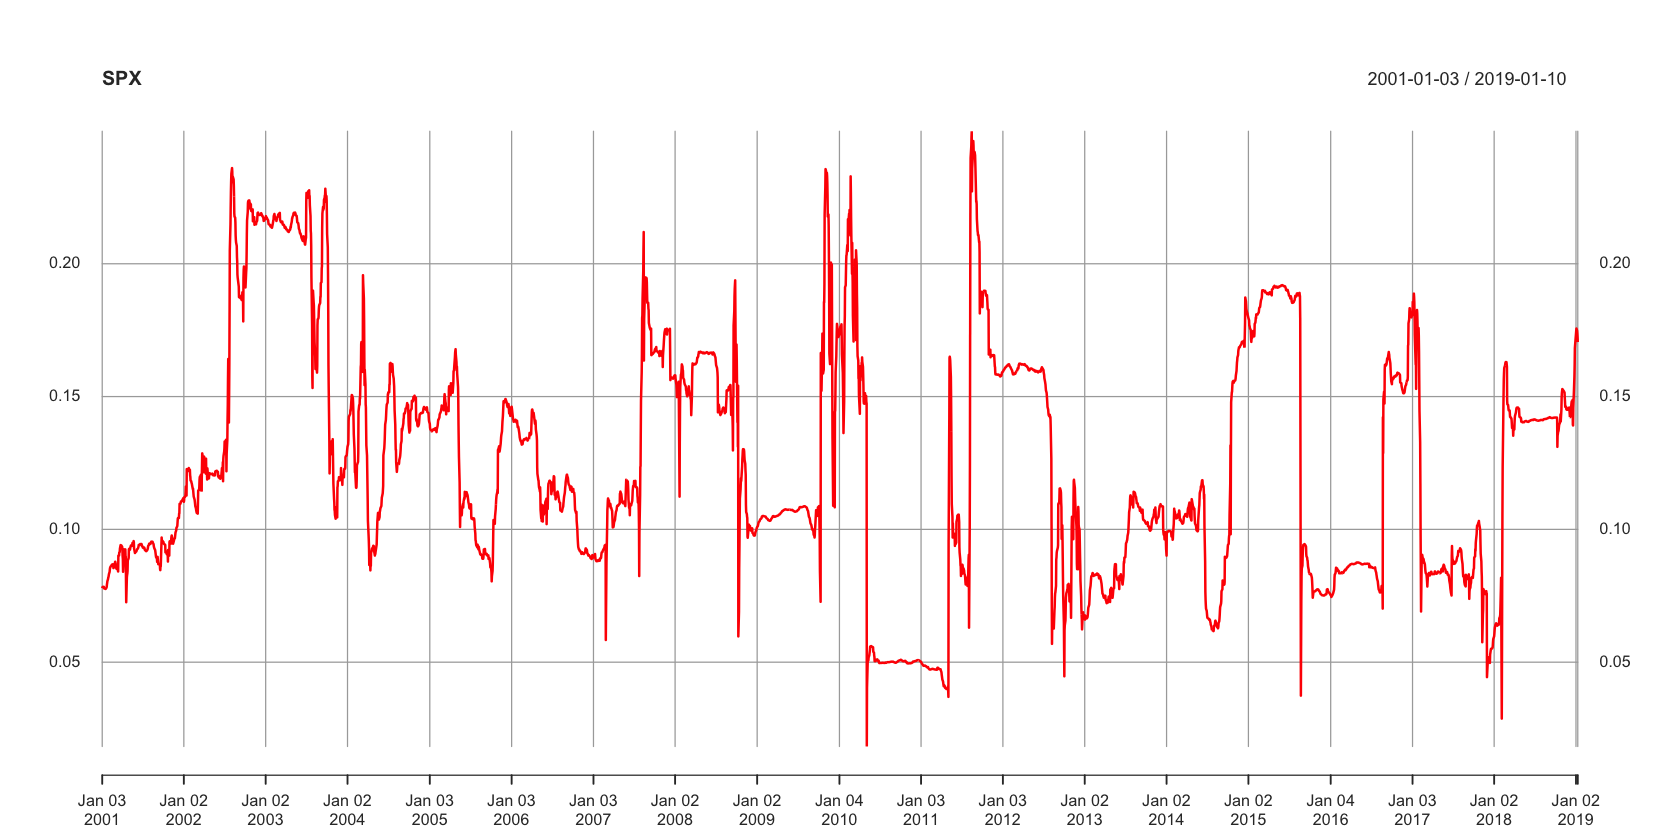

In [31]:
options(repr.plot.width=14,repr.plot.height=7)
plot(h.spx.252,main="SPX",ylab="H",col="red")
abline(h=median(h.spx.252),lty=2,col="red",lwd=2)
abline(h=mean(h.spx.252),lty=2,col="blue",lwd=2)

Figure 7: Time series of $H$ using data realized kernel estimates.

### Time series of $H$ for STOXX50

In [32]:
h.stoxx.252 <- h.acf.series(stoxx.rk)(252)

Warning message in xts(res, order.by = index(series[(1 + del):length(series)]), :
“‘tzone’ setting ignored for  Date  indexes”

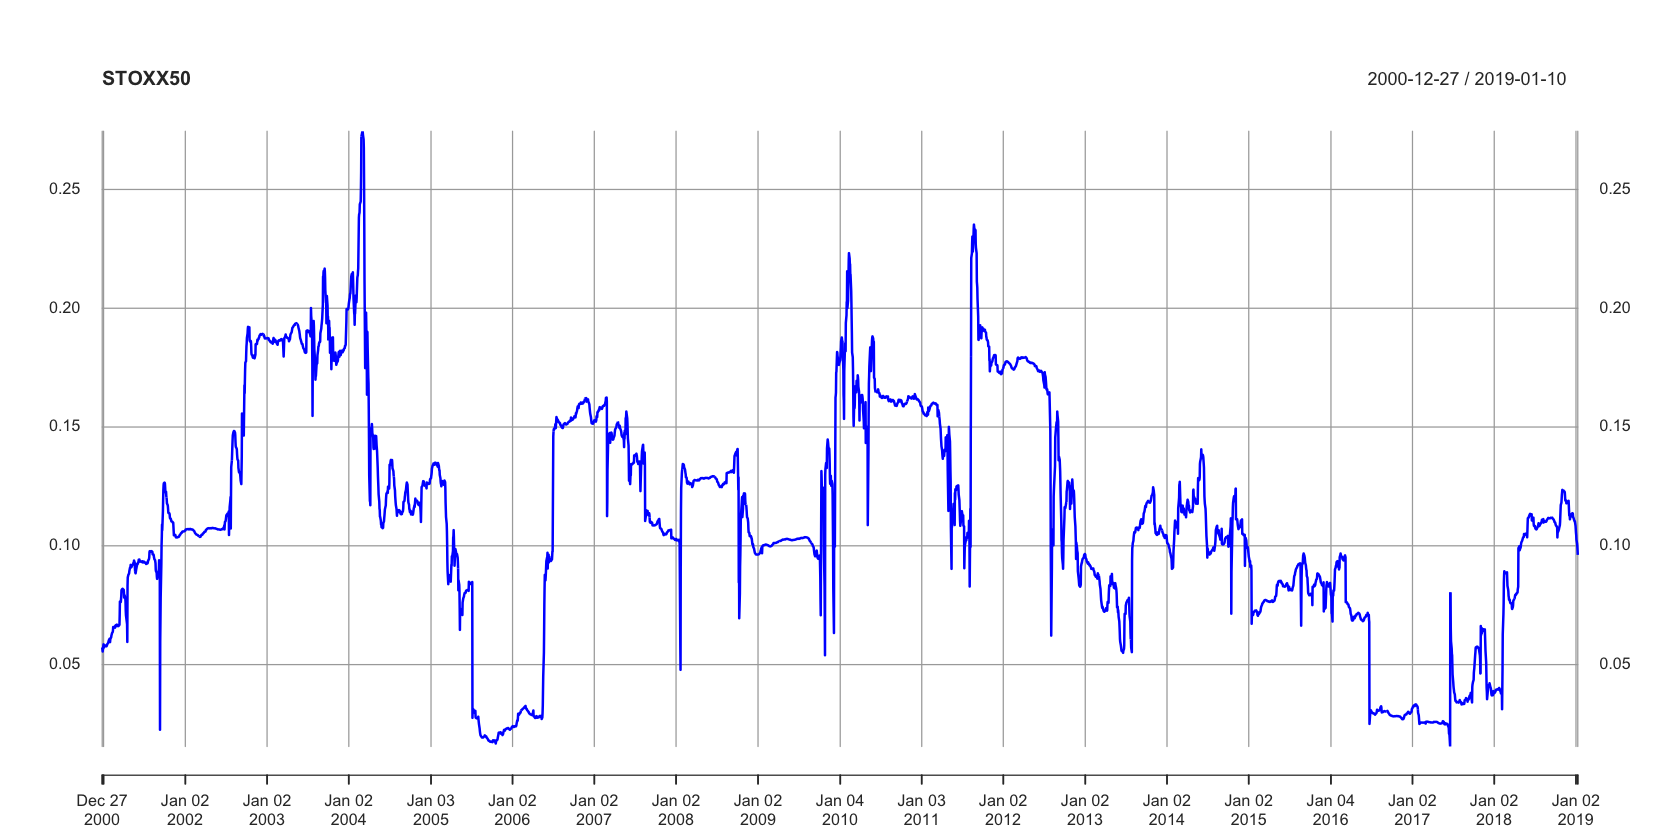

In [33]:
plot(h.stoxx.252,main="STOXX50",ylab="H",col="blue")
abline(h=median(h.stoxx.252),lty=2,col="red")
abline(h=mean(h.stoxx.252),lty=2,col="blue")

Figure 8: Time series of $H$ for STOXX50 using data realized kernel estimates.

### Plot both together 

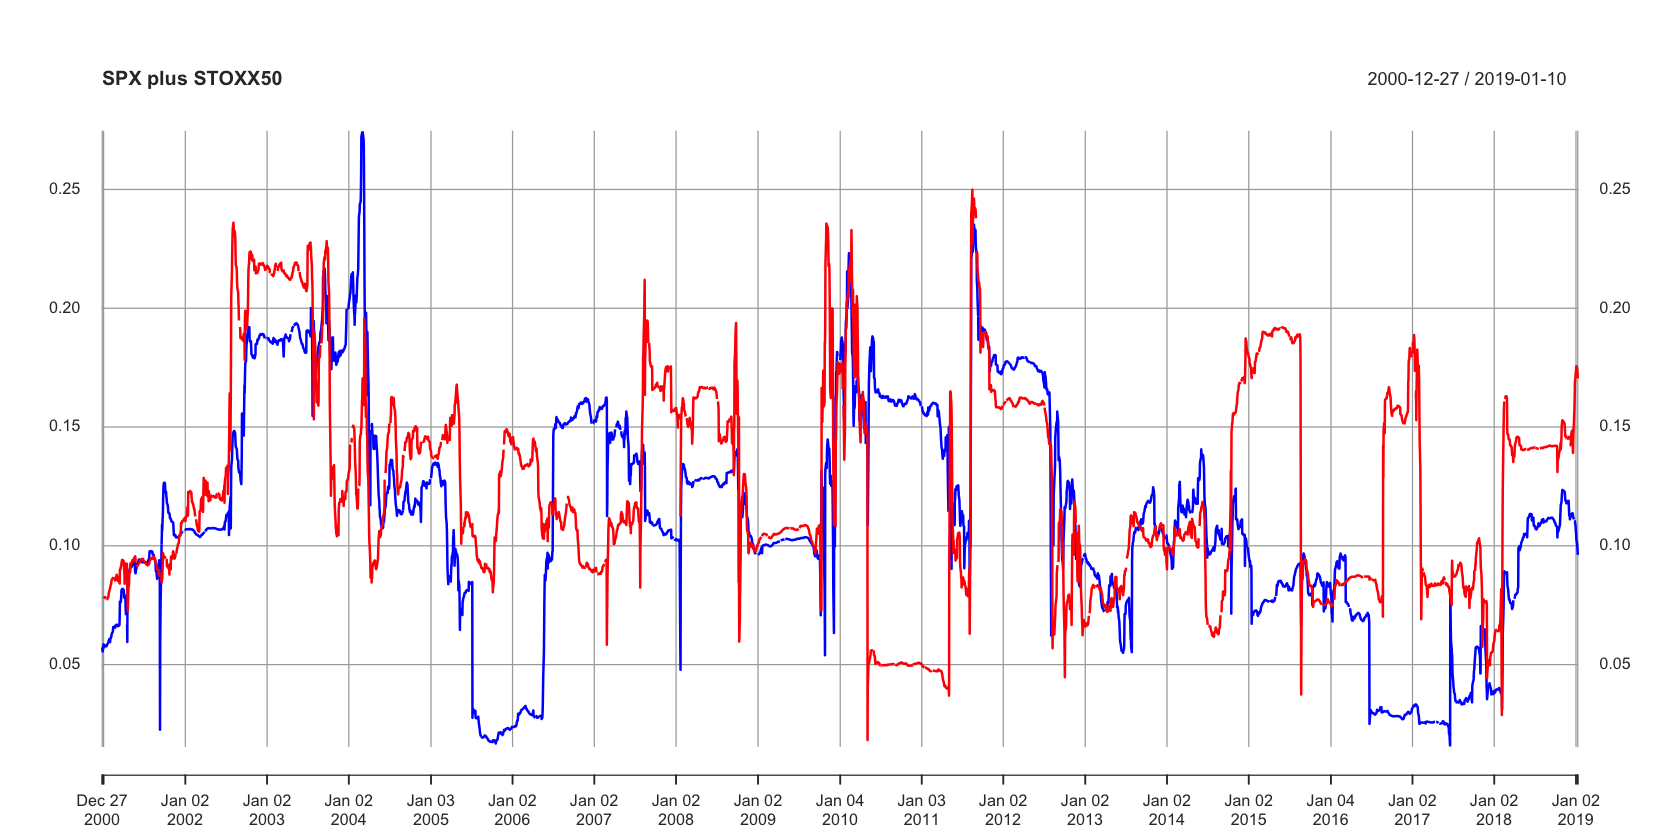

In [34]:
plot(cbind(h.spx.252,h.stoxx.252),main="SPX plus STOXX50",col=c("red","blue"),lwd=2,major.ticks= "years",
        minor.ticks = FALSE)
legend((x="topleft"), legend = c("SPY", "STOXX50"),lty = 1,lwd=2,col = c("red","blue"))

- Figure 9: Sometimes the peaks line up, and sometimes not.

### Line up time series of $H$ with VIX

- First we use `quantmod` to download VIX data.

In [35]:
options("getSymbols.warning4.0"=FALSE,"getSymbols.yahoo.warning"=FALSE)
getSymbols('^VIX',from="2001-01-01")

[1] "VIX"

### Superimpose VIX and H time series

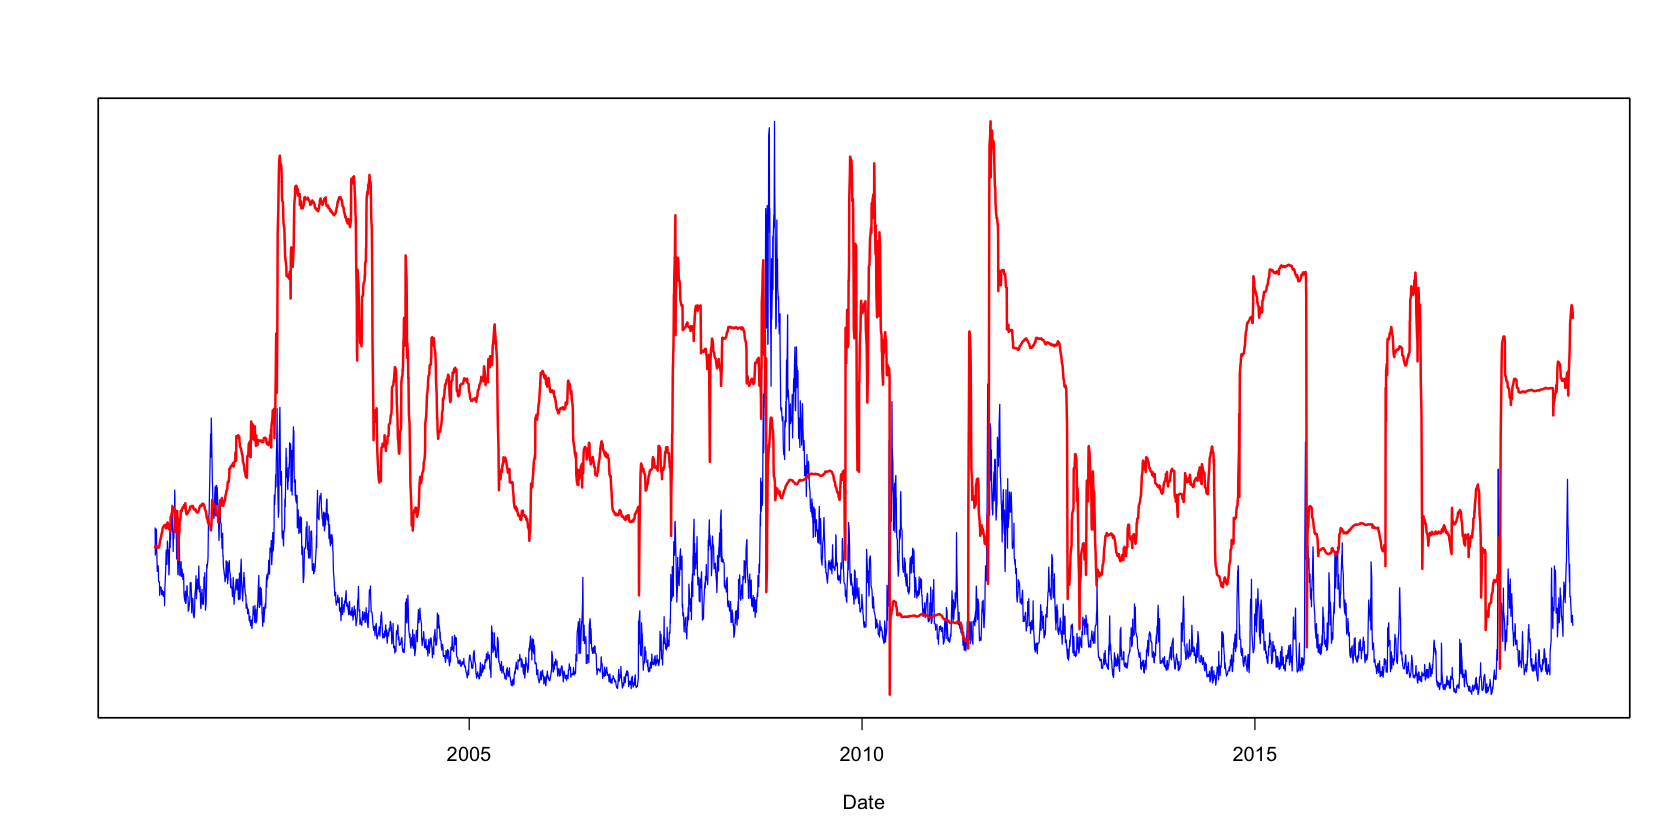

In [36]:
plot(as.zoo(Cl(VIX)),col="blue",yaxt="n",ylab="",xlab="Date")
par(new=TRUE)               
plot(as.zoo(h.spx.252),col="red", xaxt="n", yaxt="n",  xlab="", ylab="",lwd=2)

Figure 10: VIX in blue; H in red.  Sometimes $H$ increases with VIX and sometimes not.

### Comte and Renault: FSV model

<span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>5<span>]</span></a></sup> were perhaps the first to model volatility using fractional Brownian motion.  

In their fractional stochastic volatility (FSV) model,

$$
\bea
\frac{dS_t}{S_t} &=& \sigma_t\,dZ_t\nonumber\\
d\log \sigma_t &=& -\alpha\,(\log \sigma_t - \theta)\,dt+ \gamma\,d\hat W^H_t
%\label{eq:FSV}
\eea
$$

with

$$
\hat W^H_t = \int_0^t\,\frac{(t-s)^{H-1/2}}{\Gamma(H+1/2)}\,dW_s,\quad 1/2 \leq H < 1
$$

and $\ee{dW_t\,dZ_t}=\rho\,dt$.

### RFSV and FSV

 
  - The model [(1)](#eq:dataDriven):
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$
is not stationary.
     - Stationarity is desirable both for mathematical tractability and also to ensure reasonableness of the model at very large times. 
  
  
- The RFSV model (the stationary version of [(1)](#eq:dataDriven)) is formally identical to the FSV model.  Except that
 
  - $H<1/2$ in RFSV vs $H>1/2$ in FSV.
  - $\alpha\,T \gg1$  in RFSV vs $\alpha\,T \sim 1$ in FSV,
  where $T$ is a typical timescale of interest.


  

### FSV and long memory

 
- Why did <span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>6<span>]</span></a></sup> choose $H>1/2$?
 
  - Because it has been a widely-accepted stylized fact that the volatility time series exhibits long memory.  


- In this technical sense, *long memory* means that the autocorrelation function of volatility decays as a power-law.


- One of the influential papers that established this was  <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[2]</span></a></sup> which estimated the degree $d$ of fractional integration from daily realized variance data for the 30 DJIA stocks.  They effectively tried to fit something like FIGARCH.
 
  - Using the GPH (Geweke-Porter-Hudak) estimator, they found $d$ around $0.35$ which implies that the ACF $\rho(\tau)  \sim \tau^{2\,d-1} = \tau ^{-0.3}$ as $\tau \to \infty$.
 
 

### Log-log plot of empirical autocorrelation of volatility (correlogram)

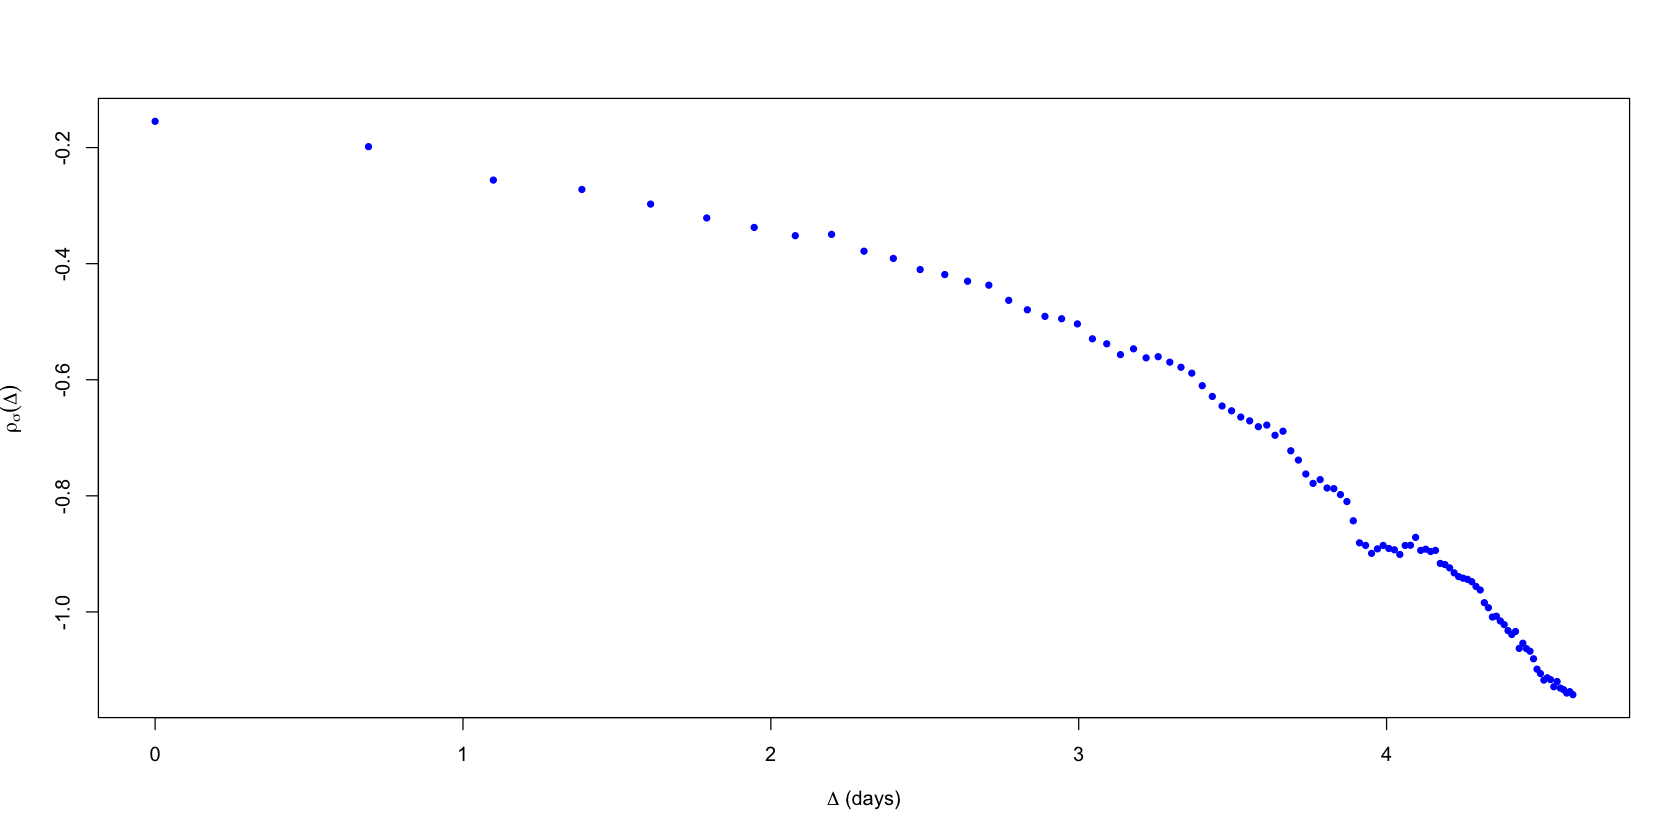

In [37]:
v <- as.numeric(rv.list[[".SPX"]]  )
ac.sig <- acf(sqrt(v),lag=100,plot=F)
plot(log(ac.sig$lag[-1]),log(ac.sig$acf[-1]),pch=20,
     ylab=expression(rho[sigma](Delta)),xlab=expression(paste(Delta," (days)")),col="blue")

Figure 5: A correlogram of $\sigma_t=\sqrt{RV_t}$; it doesn't look linear!

### Power-law fit

- We exclude the first 20 points so as to fit the tail.

In [38]:
(fit.lm <- lm(log(ac.sig$acf[-1][-(1:20)]) ~ log(ac.sig$lag[-1][-(1:20)])))


Call:
lm(formula = log(ac.sig$acf[-1][-(1:20)]) ~ log(ac.sig$lag[-1][-(1:20)]))

Coefficients:
                 (Intercept)  log(ac.sig$lag[-1][-(1:20)])  
                      0.7912                       -0.4151  


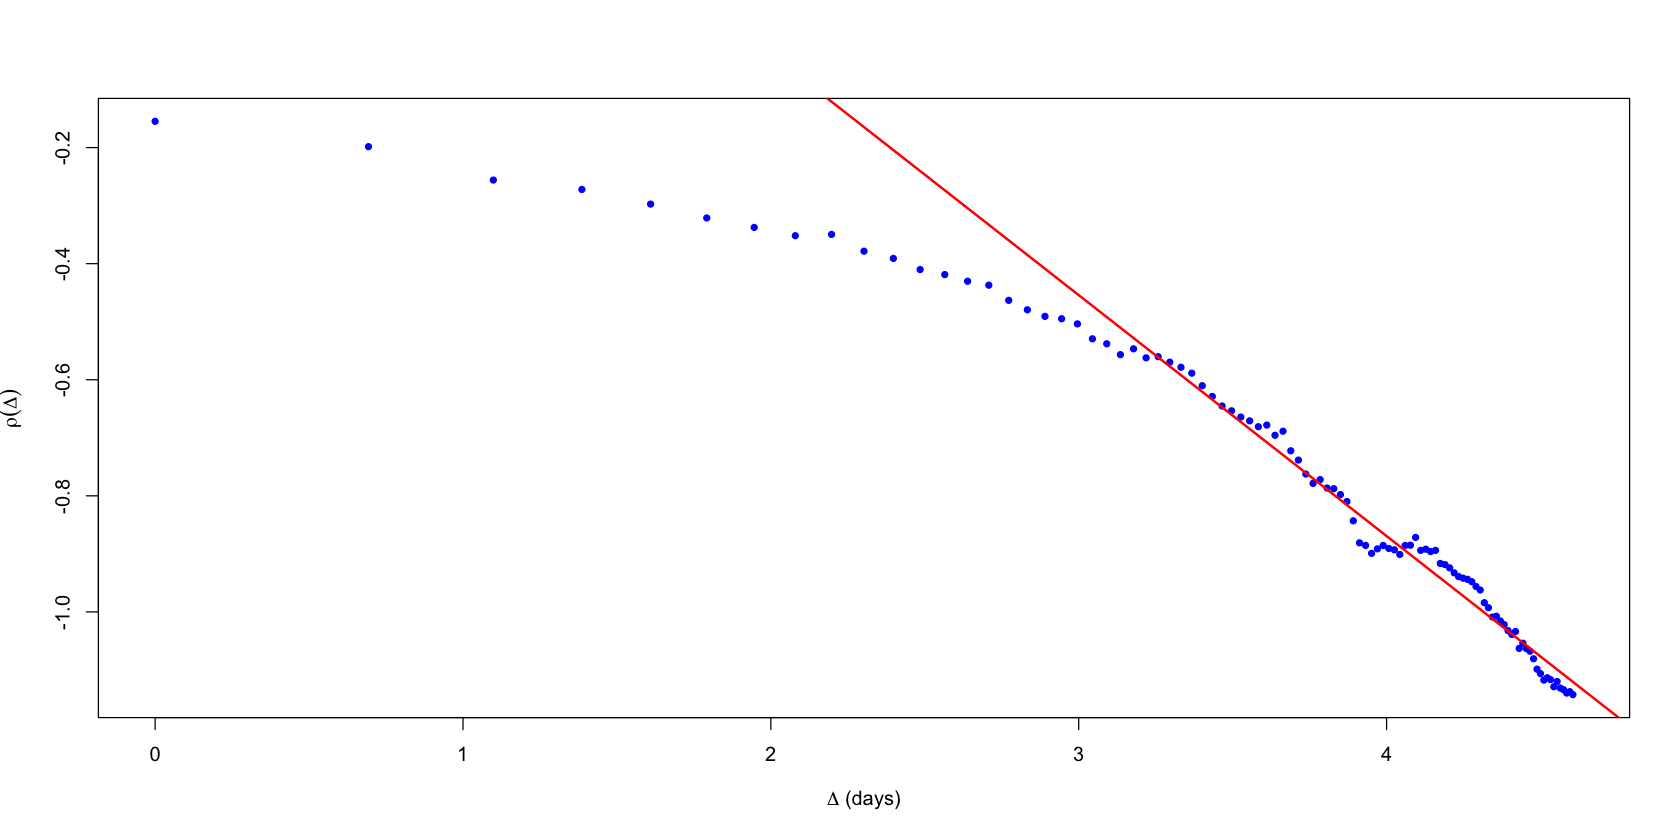

In [39]:
plot(log(ac.sig$lag[-1]),log(ac.sig$acf[-1]),pch=20,
     ylab=expression(rho(Delta)),xlab=expression(paste(Delta," (days)")),col="blue")
abline(fit.lm,col="red",lwd=2)

Figure 6: Correlogram of $\sigma_t=\sqrt{RV_t}$ with power-law fit.

- In other words, just fitting a straight line to the log-log plot of the autocorrelation $\rho_\sigma(\Delta)$ of the volatility we get
<p>
$$
\rho_\sigma(\Delta) \sim \Delta^{-0.4}
$$
as $\Delta \to \infty$.


- This corresponds to $d=0.3$, consistent with the $d=0.35$ found by <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[</span>1<span>]</span></a></sup>.


- Note however that the correlogram does not look like a straight line on the log-log plot!

### Plot vs $\Delta^{2 H}$

- Again, we have $\log \sigma_t = \nu\,W^H_t + \text{const.}$ so
<p>
$$
\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]
=\var\left[\log \sigma_t\right] -\nu^2\,t^{2\,H} \,\Delta ^{2 H}.
$$


- Thus $\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]$ should be a linear function of $\Delta ^{2 H}$.


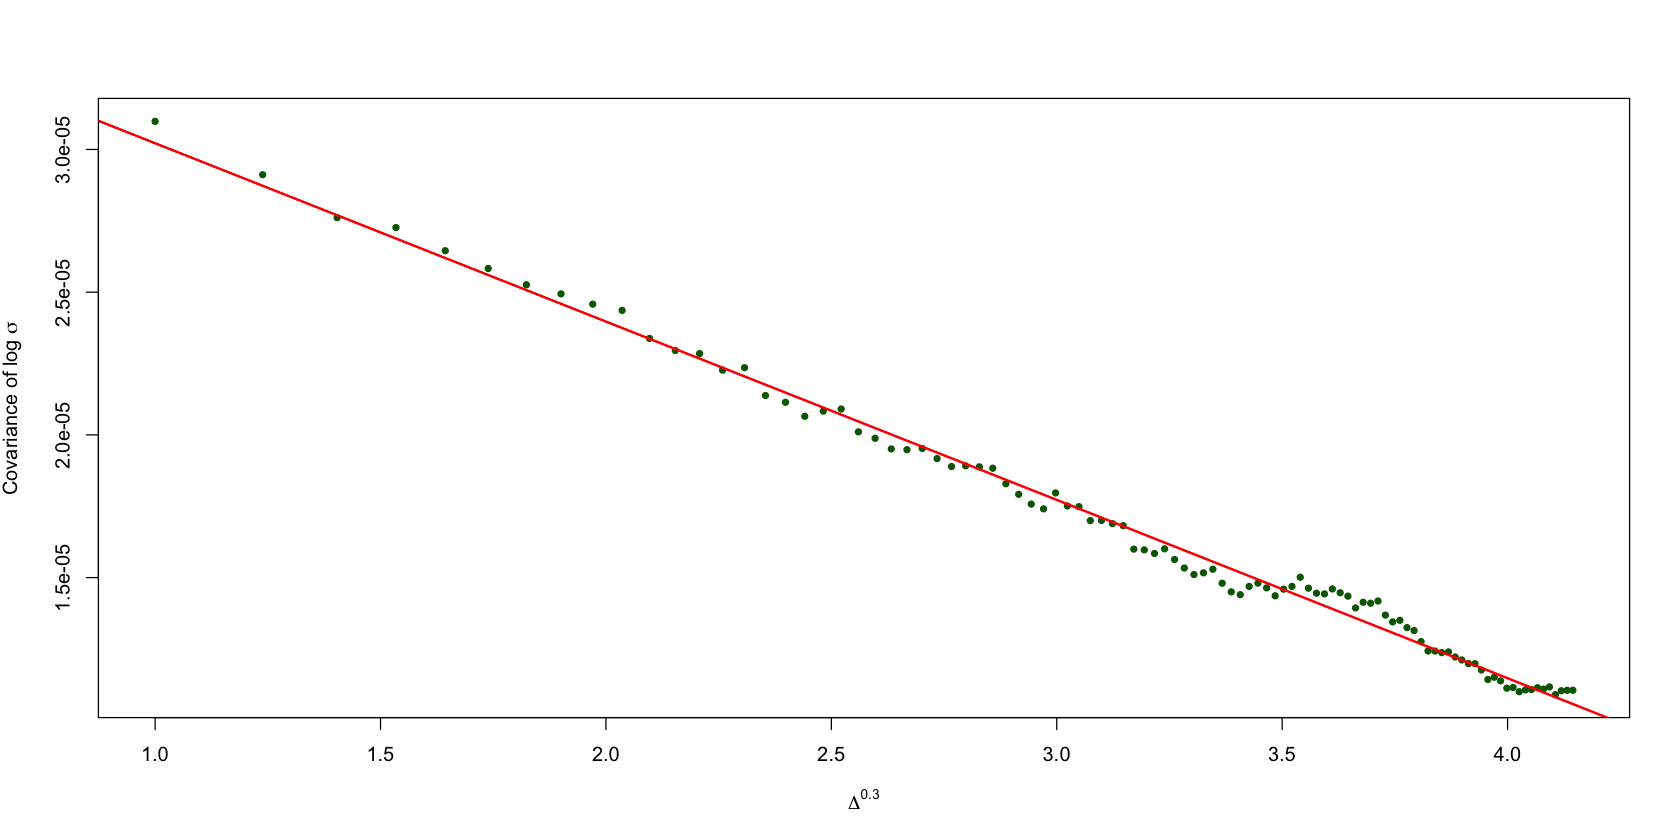

In [38]:
sig.cov <- acf(sig,lag.max=100,type="covariance",plot=F)$acf[-1]
x <- (1:100)^(2*h.spx.regression)
plot(x,sig.cov,pch=20,col="dark green",ylab= expression(paste("Covariance of log ",sigma)),xlab=expression(Delta^0.30 ))
abline(lm(sig.cov~x),col="red",lwd=2)

Figure 7: The data is very consistent with the RFSV model.


### Long memory of volatility may be spurious

 
- Figures 5, 6, and 7 all demonstrate consistency of the realized kernel data with RFSV and are inconsistent with power-law decay of the autocorrelation function.
    - RFSV does not have this long memory property.


- Moreover, <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>6<span>]</span></a></sup> simulate volatility in the RFSV model and apply standard estimators to the simulated data.

    - Real data and simulated data generate very similar plots and similar estimates of the long memory parameter to those found in the prior literature.



- Classical estimation procedures seem to identify spurious long memory of volatility.


- Here is a quote from <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[</span>4<span>]</span></a></sup>:

> Having examined intraday volatility measurements on the E-mini S&P 500 futures contract, we can conclude that volatility is rough, highly persistent, and non-Gaussian. However, we were unable to distinguish between genuine long memory and persistence, yet technically short memory in the data.

 

### Incompatibility of FSV with realized variance (RV) data

 
  - In Figure 9, we demonstrate graphically that long memory volatility models such as FSV with $H>1/2$ are not compatible with the RV data.


  - In the FSV model, the autocorrelation function $\rho(\Delta) \propto \Delta^{2\,H-2}$.  Then, for long memory, we must have $1/2<H<1$.
    - For $\Delta \gg 1/\alpha$, stationarity kicks in and $m(2,\Delta)$ tends to a constant as $\Delta \to \infty$.
    - For $\Delta \ll 1/\alpha$, mean reversion is not significant and $m(2,\Delta) \propto \Delta^{2\,H}$.
  
 

### RFSV vs FSV

- We can compute $m(2,\Delta)$ explicitly in both the FSV and RFSV models.


- The smallest possible value of $H$ in FSV is $H=1/2$.  One empirical estimate in the literature says that $H \approx 0.53$ some time in 2008.  

- Let's see how the theoretical estimates of $m(2,\Delta)$ compare with data.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/FsvVsRFSV.png" align = "left" width=900></h3> 

Figure 8: Black points are empirical estimates of $m(2,\Delta)$; the blue line is the FSV model with $\alpha=0.5$ and $H=0.53$; the orange line is the RFSV model with $\alpha=0$ and $H=0.14$.


### Does simulated RSFV data look real?

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/11/volRealFake.png" align = "left" width=900></h3> 

Figure 9: Volatility of SPX (above) and of the RFSV model (below).

### Remarks on the comparison

 
  - In respect of roughness, the simulated and actual graphs look very alike. 
 
      - Persistent periods of high volatility alternate with low volatility periods. 
  
  
  - $H \sim 0.1$ generates very rough looking sample paths (compared with $H=1/2$ for Brownian motion).
 
 
  - Hence *rough volatility*.
 

 
  - On closer inspection, we observe fractal-type behavior.
 
 
  - The graph of volatility over a small time period looks like the same graph over a much longer time period.
 
 
  - This feature of volatility has been investigated both empirically and theoretically in, for example, <span>[Bacry and Muzy]<sup id="cite_ref-BacryMuzy" class="reference"><a href="#cite_note-BacryMuzy"><span>[3]</span></a></sup>
.
      - In particular, their Multifractal Random Walk (MRW) is related to a limiting case of the RSFV model as $H \to 0$.
  
 

### Summary

 
  - We uncovered a remarkable monofractal scaling relationship in historical volatility.
      - Conventional long memory models are inconsistent with this scaling relationship.
      - Prior work indicating long memory in volatility time series is not supported.
      
      
  - The Hurst exponent $H$ varies over time.
      - Peaks typically correspond to periods of market stress.
   
 
 
  - These empirical observations lead  naturally to the non-Markovian stochastic volatility RFSV model under $\mP$.
  
 

### References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-Alos"><span class="mw-cite-backlink"><b><a href="#cite_ref-Alos">^</a></b></span> 
Alòs, Elisa, Jorge A León, and Josep Vives, On the short-time behavior of the implied volatility for jump-diffusion models with stochastic volatility, *Finance and Stochastics* **11**(4) 571-589 (2007).
</li>

<li id="cite_note-ABDE"><span class="mw-cite-backlink"><b><a href="#cite_ref-ABDE">^</a></b></span>
Torben G Andersen, Tim Bollerslev, Francis X Diebold, and Heiko Ebens, The distribution of realized stock return volatility, *Journal of Financial Economics* **61**(1) 43-76 (2001).
</li>

 
<li id="cite_note-BacryMuzy"><span class="mw-cite-backlink"><b><a href="#cite_ref-BacryMuzy">^</a></b></span>
Emmanuel Bacry and Jean-François Muzy, Log-infinitely divisible multifractal processes, 
*Communications in Mathematical Physics* **236**(3) 449-475 (2003).</li>



<li id="cite_note-BLPdecoupling"><span class="mw-cite-backlink"><b><a href="#cite_ref-BLPdecoupling">^</a></b></span>
Mikkel Bennedsen, Asger Lunde, and Mikko S. Pakkanen, Decoupling the short-and long-term behavior of stochastic volatility,  (2016).</li>

<li id="cite_note-ComteRenault"><span class="mw-cite-backlink"><b><a href="#cite_ref-ComteRenault">^</a></b></span> 
Fabienne Comte and Eric Renault, Long memory in continuous-time stochastic volatility models, *Mathematical Finance* **8** 29-323(1998).</li>

<li id="cite_note-ElEuchRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-ElEuchRosenbaum">^</a></b></span> 
Omar El Euch and Mathieu Rosenbaum, The characteristic function of rough Heston models, *Mathematical Finance* forthcoming (2018).</li>

<li id="cite_note-Fukasawa"><span class="mw-cite-backlink"><b><a href="#cite_ref-Fukasawa">^</a></b></span> 
Masaaki Fukasawa, Asymptotic analysis for stochastic volatility: Martingale expansion, *Finance and Stochastics* **15** 635-654 (2011).</li>


<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, *Quantitative Finance* **18**(6) 933-949 (2018).</li>


<li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel Oomen, Zero-intelligence realized variance estimation, *Finance and Stochastics* **14**(2) 249-283 (2010).</li> 

<li id="cite_note-JaissonRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-JaissonRosenbaum">^</a></b></span> Thibault Jaisson and Mathieu Rosenbaum, Rough fractional diffusions as scaling limits of nearly unstable heavy tailed Hawkes processes, *The Annals of Applied Probability*, **26**(5) 2860-2882 (2016).</li>


 
 

</ol>
  


 